In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

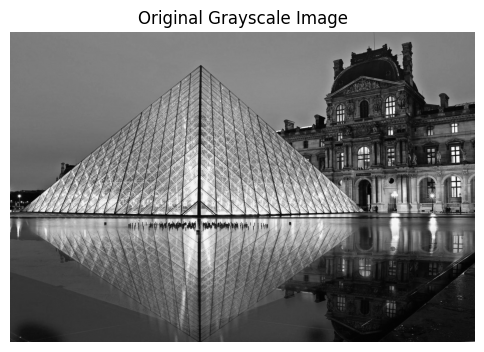

In [2]:
# Load the image in grayscale
image = cv2.imread('monument.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the image
plt.figure(figsize=(6,6))
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()

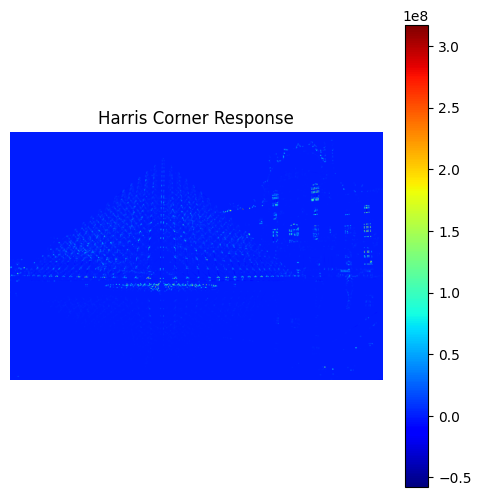

In [3]:
# Convert image to float32
gray_float = np.float32(gray)

# Apply Harris corner detection
corner_response = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)

# Dilate the result for better visualization
corner_response = cv2.dilate(corner_response, None)

# Display the corner response
plt.figure(figsize=(6,6))
plt.imshow(corner_response, cmap='jet')
plt.title("Harris Corner Response")
plt.axis("off")
plt.colorbar()
plt.show()

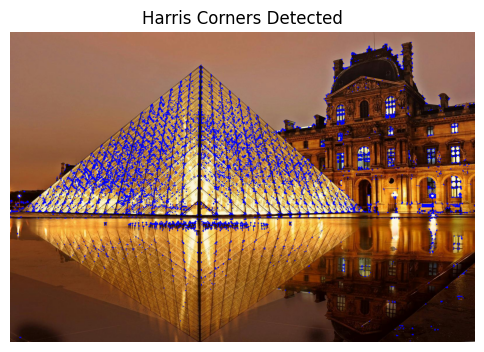

In [4]:
# Thresholding: Mark strong corners in red
threshold = 0.01 * corner_response.max()  # Adjust this threshold if needed
image_with_corners = image.copy()
image_with_corners[corner_response > threshold] = [255, 0, 0]  # Mark in red

# Display the final result
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
plt.title("Harris Corners Detected")
plt.axis("off")
plt.show()

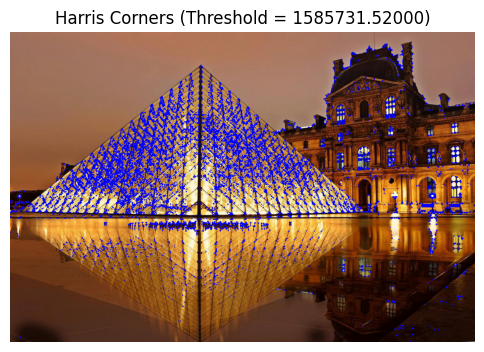

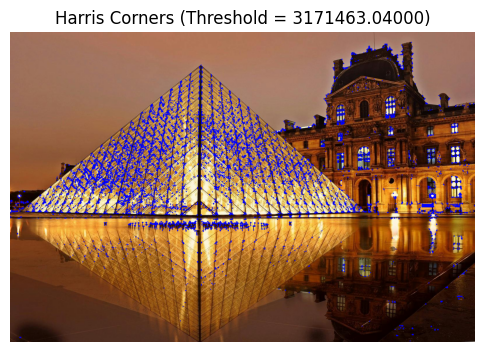

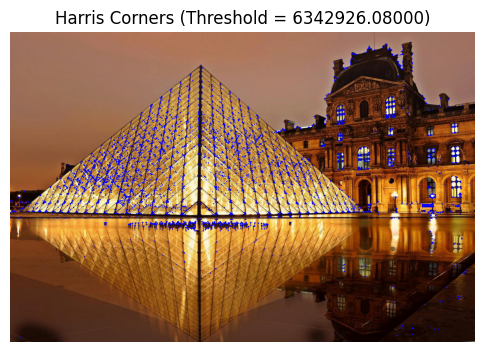

In [5]:
def display_corners(threshold_value):
    image_copy = image.copy()
    image_copy[corner_response > threshold_value] = [255, 0, 0]  # Mark in red

    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
    plt.title(f"Harris Corners (Threshold = {threshold_value:.5f})")
    plt.axis("off")
    plt.show()

# Experiment with different thresholds
threshold_values = [0.005 * corner_response.max(), 0.01 * corner_response.max(), 0.02 * corner_response.max()]
for t in threshold_values:
    display_corners(t)

Shi-Tomasi Corner Detection

<ipython-input-6-6398fbc870e9>:8: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)  # Convert to integer


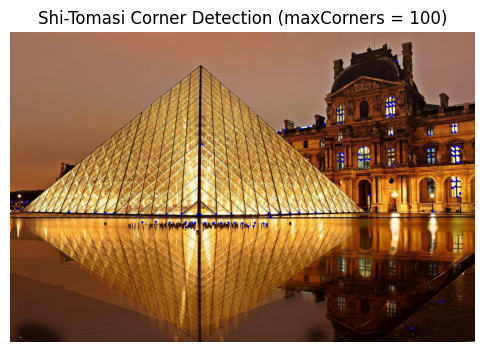

In [6]:
# Define parameters for Shi-Tomasi
maxCorners = 100  # Maximum number of corners to detect
qualityLevel = 0.01  # Minimum accepted quality of corners
minDistance = 10  # Minimum Euclidean distance between detected corners

# Detect corners
corners = cv2.goodFeaturesToTrack(gray, maxCorners, qualityLevel, minDistance)
corners = np.int0(corners)  # Convert to integer

# Draw detected corners on the image
image_with_corners = image.copy()
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image_with_corners, (x, y), 4, (255, 0, 0), -1)  # Mark in red

# Display the detected corners
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
plt.title(f"Shi-Tomasi Corner Detection (maxCorners = {maxCorners})")
plt.axis("off")
plt.show()


<ipython-input-7-c9b12a18d3dc>:4: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


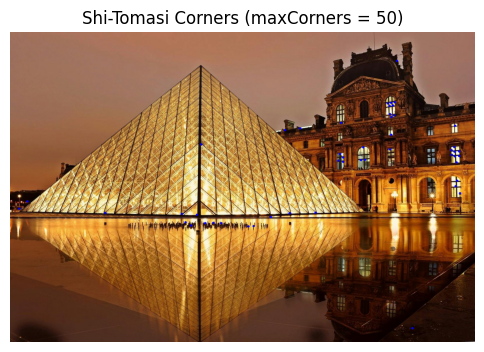

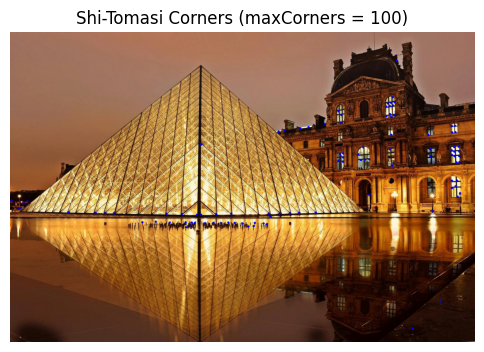

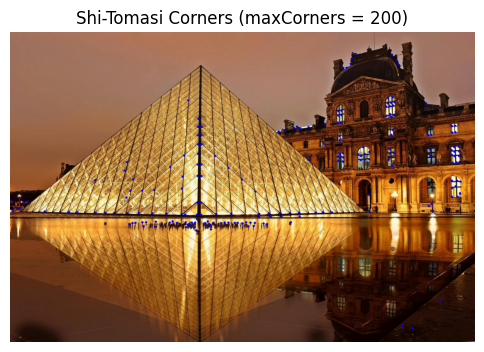

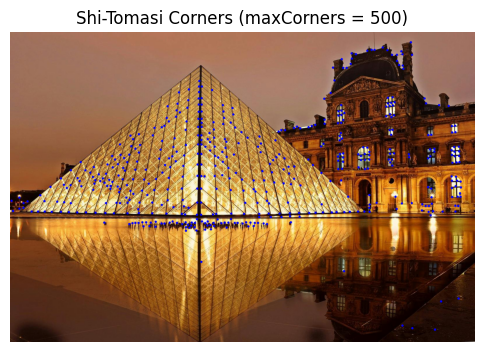

In [7]:
def display_corners(max_corners):
    # Detect corners with modified maxCorners
    corners = cv2.goodFeaturesToTrack(gray, max_corners, qualityLevel, minDistance)
    corners = np.int0(corners)

    # Draw detected corners on the image
    image_copy = image.copy()
    for corner in corners:
        x, y = corner.ravel()
        cv2.circle(image_copy, (x, y), 4, (255, 0, 0), -1)

    # Display results
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
    plt.title(f"Shi-Tomasi Corners (maxCorners = {max_corners})")
    plt.axis("off")
    plt.show()

# Experiment with different maxCorners values
for value in [50, 100, 200, 500]:
    display_corners(value)
